In [38]:
# Import the SQL database into Pandas.  
from sqlalchemy import create_engine
from secrets import postgres_pw

user = 'postgres'
engine = create_engine(f'postgresql://{ user }:{ postgres_pw }@localhost:5433/pewlitt_hackard_employees')
connection = engine.connect()

In [39]:
# figure out the salary ranges
import pandas.io.sql as psql

salaries_df = psql.read_sql('SELECT salary_id, emp_no, CAST(salary AS DECIMAL), to_date, from_date FROM salaries', 
              connection, 
              index_col='salary_id'
             )
salaries_df.head(10)

emp_no   salary     to_date   from_date
salary_id                                         
1           10001  60117.0  1987-06-26  1986-06-26
2           10002  65828.0  1997-08-03  1996-08-03
3           10003  40006.0  1996-12-02  1995-12-03
4           10004  40054.0  1987-12-01  1986-12-01
5           10005  78228.0  1990-09-12  1989-09-12
6           10006  40000.0  1991-08-05  1990-08-05
7           10007  56724.0  1990-02-10  1989-02-10
8           10008  46671.0  1999-03-11  1998-03-11
9           10009  60929.0  1986-02-18  1985-02-18
10          10010  72488.0  1997-11-24  1996-11-24

In [40]:
salaries_df['salary'].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

Text(0.5, 0, 'Salary')

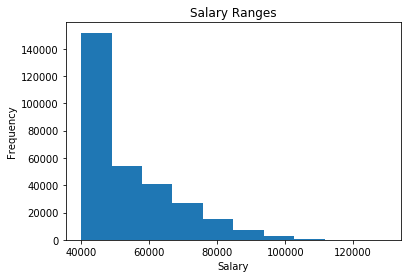

In [46]:
# Create a histogram to visualize the most common salary ranges for employees.
ax = salaries_df['salary'].plot.hist(by='salary', title='Salary Ranges')
ax.set_xlabel('Salary')

In [42]:
# Create a bar chart of average salary by title.
q = '''
SELECT
	title,
	AVG(CAST(salary AS DECIMAL))
FROM
	(SELECT 
		t.title,
		s.salary
	FROM titles AS t
	JOIN salaries AS s ON s.emp_no = t.emp_no) AS title_salaries
GROUP BY title;
'''
salary_avgs = psql.read_sql(q, connection)

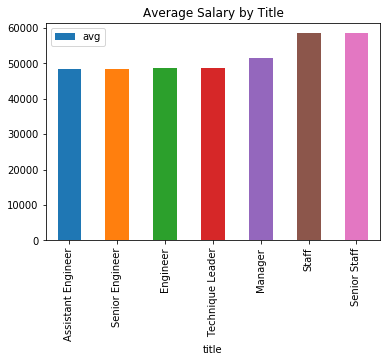

In [43]:
sorted = salary_avgs.sort_values('avg')
sorted.plot.bar('title', 'avg', title='Average Salary by Title')